# Gevaar of fabel

Namen: Puck, Sally, Jelle, Isa

Groep nummer: 

In [2]:
url = 'https://e3.365dm.com/16/01/2048x1152/rtx1v9p9-1-2048x1536_3402067.jpg'

from IPython.display import Image, display

width = 800
height = 400

subtitle = "© Getty images"

image = Image(url=url, width=width, height=height)

display(image)
print(subtitle)

© Getty images


## Introductie

De vluchtelingencrisis is een van de meest controversiële onderwerpen in het publieke debat. Veel tegenstanders beweren dat de stijging van vluchtelingen binnen Europa aanzet tot verhoogde veiligheidsrisico's, in het bijzonder meer terroristische aanslagen. In 2015 werd Parijs getroffen door een reeks aanslagen. Ondanks dat de terroristen Europese burgers waren werd de vluchtelingencrisis als oorzaak aangewezen (do Céu Pinto Arena, 2017). Door de aanhoudende conflicten  in Syrië, Afghanistan en Irak kwamen steeds meer burgers naar Europa in de hoop voor veiligheid. Hoewel dit voor een langere tijd speelde, werd er vanaf 2015 gesproken van een vluchtelingencrisis. Deze toename startte echter al in 2013, wat ook te zien is in de grafiek hieronder.

## Dataset en Preprocessing

xx

## Perspectief 1

X

### argument 1 perspectief 1

x

In [9]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the data from table1.csv
df = pd.read_csv('population_eu.csv')
df2 = df[df.Year.between(2000, 2017)]

df3 = pd.read_csv('aanslagen_per_jaar.csv')

colors = ['rgb(238, 75, 43)', 'rgb(252,245,245)', 'rgb(129, 133, 137)']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df2['Year'],
    y=df2["Refugees under UNHCR's mandate"],
    marker_color='rgb(238, 75, 43)',
    name="Refugees",
    yaxis='y'  
))

fig.update_layout(
    title='Aantal vluchtelingen in Europa',
    xaxis=dict(type='category'),
    yaxis=dict(range=[0, 22000000], title="Vluchtelingen onder UNHCR's mandate" , side='left'),
    xaxis_title='Jaar',
    height=500,
    bargap=0.1,
    plot_bgcolor='rgb(252,245,245)',
)

fig.show()

> *Figure 1: Het aantal vluchtelingen in Europa onder het UNHCR mandaat

x

In [11]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

colors = ['rgb(238, 75, 43)', 'rgb(252,245,245)', 'rgb(129, 133, 137)']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df2['Year'],
    y=df2["Refugees under UNHCR's mandate"],
    marker_color='rgb(238, 75, 43)',
    name="Vluchtelingen",
    yaxis='y'  
))

fig.add_trace(go.Scatter(
    x=df3['year'],
    y=df3[('count')],
    marker_color='rgb(129, 133, 137)',
    name="Aanslagen",
    yaxis='y2'  
))

fig.update_layout(
    title='Aantal vluchtelingen en terroristische aanslagen in Europa',
    xaxis=dict(type='category'),
    yaxis=dict(range=[0, 22000000], title="Vluchtelingen onder UNHCR's mandate" , side='left'),
    yaxis2=dict(range=[0, 30], title="Terroristische aanslagen", overlaying='y', side='right'),  
    xaxis_title='Jaar',
    height=500,
    bargap=0.1,
    plot_bgcolor='rgb(252,245,245)',
)

fig.show()

> *Figure 2: Bar chart van het aantal vluchtelingen samen met het aantal teroristische aanvallen in Europa

x

### Tweede argument eerste perspectief 

x

/tmp/ipykernel_16122/3169645464.py:38: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



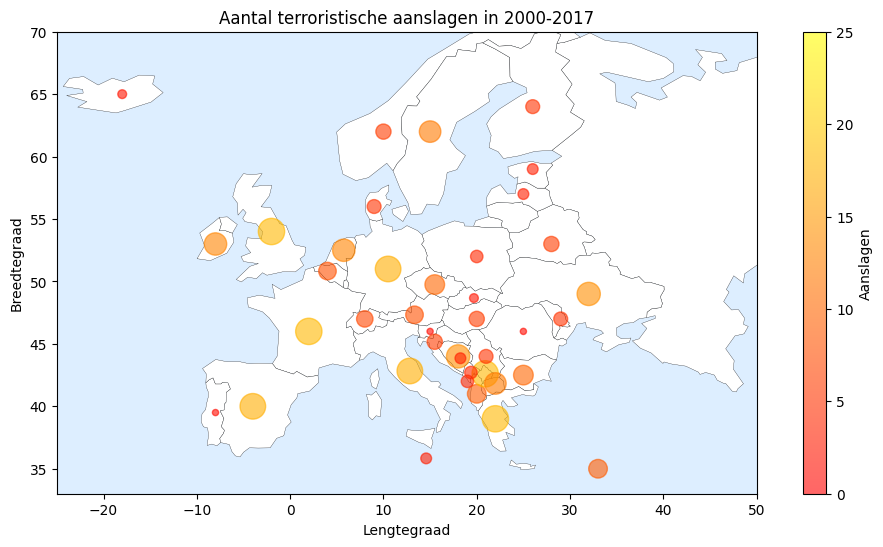

In [13]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df2 = pd.read_csv('totale_aanslagen_per_land_lang.csv', usecols=["country","count", "latitude", "longitude"])

# Applying +/- based on direction and converting to numeric datatype
for x in range(len(df2['longitude'])):
    if str(df2.loc[x, 'longitude'])[-1] == 'E':
        df2.loc[x, 'longitude'] = str(df2.loc[x, 'longitude'])[:-1]
    if str(df2.loc[x, 'longitude'])[-1] == 'W':
        df2.loc[x, 'longitude'] = \
            '-' + str(df2.loc[x, 'longitude'])[:-1]

for x in range(len(df2['latitude'])):
    if str(df2.loc[x, 'latitude'])[-1] == 'N':
        df2.loc[x, 'latitude'] = str(df2.loc[x, 'Latitude'])[:-1]
    if str(df2.loc[x, 'latitude'])[-1] == 'S':
        df2.loc[x, 'latitude'] = \
            '-' + str(df2.loc[x, 'latitude'])[:-1]

df2['longitude'] = pd.to_numeric(df2['longitude'], errors='coerce')
df2['latitude'] = pd.to_numeric(df2['latitude'], errors='coerce')

# Converting to numeric datatype
threshold = 25
df = df2[df2['count'] < threshold]
df['count'] = pd.to_numeric(df['count'], 
                                         errors='coerce')

# Dropping the errors from data conversions and resetting index
df2.dropna()
df2 = df2.reset_index(drop=True)

# From GeoPandas, our world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
europe.plot(color="white", ax=ax, edgecolor='black', linewidth = 0.2)

# Plotting our Impact Energy data with a color map
x = df2['longitude']
y = df2['latitude']
z = df2['count']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            cmap='autumn')
plt.colorbar(label='Aanslagen')

# Creating axis limits and title
plt.xlim([-25, 50])
plt.ylim([33, 70])
ax.set_facecolor('#DDEEFF')

plt.title("Aantal terroristische aanslagen in 2000-2017")
plt.xlabel("Lengtegraad")
plt.ylabel("Breedtegraad")
plt.show()

> *Figure 3: x

x

## Your Second Perspective

x

### The First Argument of Your Second Perspective

x

/tmp/ipykernel_16122/2559920140.py:38: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



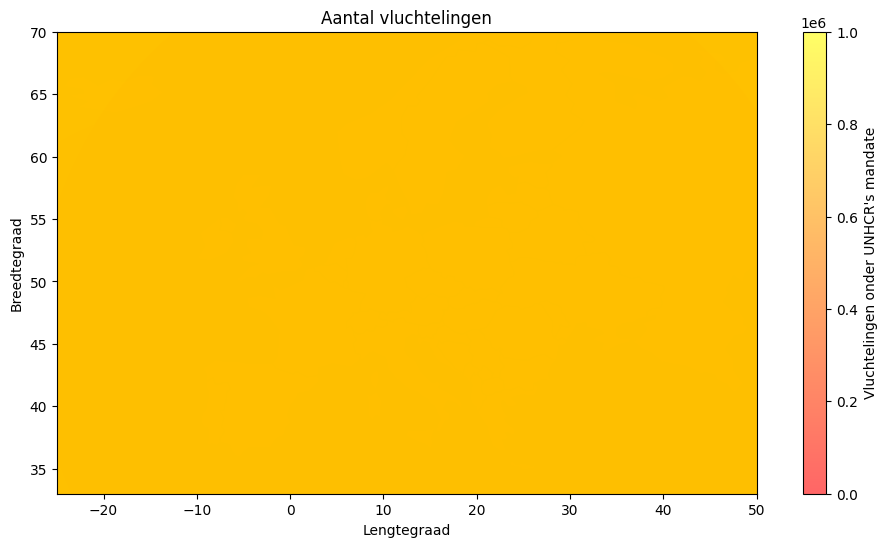

In [15]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df3 = pd.read_csv('totale_aanslagen_per_land_long.csv', usecols=["country","Refugees under UNHCR's mandate", "latitude", "longitude"])

# Applying +/- based on direction and converting to numeric datatype
for x in range(len(df3['longitude'])):
    if str(df3.loc[x, 'longitude'])[-1] == 'E':
        df3.loc[x, 'longitude'] = str(df3.loc[x, 'longitude'])[:-1]
    if str(df3.loc[x, 'longitude'])[-1] == 'W':
        df3.loc[x, 'longitude'] = \
            '-' + str(df3.loc[x, 'longitude'])[:-1]

for x in range(len(df3['latitude'])):
    if str(df3.loc[x, 'latitude'])[-1] == 'N':
        df3.loc[x, 'latitude'] = str(df3.loc[x, 'Latitude'])[:-1]
    if str(df3.loc[x, 'latitude'])[-1] == 'S':
        df3.loc[x, 'latitude'] = \
            '-' + str(df3.loc[x, 'latitude'])[:-1]

df3['longitude'] = pd.to_numeric(df3['longitude'], errors='coerce')
df3['latitude'] = pd.to_numeric(df3['latitude'], errors='coerce')

# Converting to numeric datatype
threshold = 1000000
df3["Refugees under UNHCR's mandate"] = pd.to_numeric(df3["Refugees under UNHCR's mandate"], 
                                         errors='coerce')
df = df3[df3["Refugees under UNHCR's mandate"] < threshold]

# Dropping the errors from data conversions and resetting index
df3.dropna()
df3 = df3.reset_index(drop=True)

# From GeoPandas, our world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
europe.plot(color="white", ax=ax, edgecolor='black', linewidth = 0.2)

# Plotting our Impact Energy data with a color map
x = df3['longitude']
y = df3['latitude']
z = df3["Refugees under UNHCR's mandate"]
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0, vmax=threshold,
            cmap='autumn')
plt.colorbar(label="Vluchtelingen onder UNHCR's mandate")

# Creating axis limits and title
plt.xlim([-25, 50])
plt.ylim([33, 70])
ax.set_facecolor('#DDEEFF')

plt.title("Aantal vluchtelingen")
plt.xlabel("Lengtegraad")
plt.ylabel("Breedtegraad")
plt.show()

> *Figure 4: x

x

### The Second Argument of Your Second Perspective

x

In [16]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df4 = pd.read_csv('migranten_per_jaar_per_land.csv')
df5 = df4[df4.Year.between(2000, 2017)]
df6 = df5[df5["Country of asylum"] == 'Belgium']

df7 = pd.read_csv('aanslagen_per_jaar_per_land.csv')
df8 = df7[df7.year.between(2000, 2017)]
df9 = df8[df8["country"] == 'Belgium']

colors = ['rgb(238, 75, 43)', 'rgb(252,245,245)', 'rgb(129, 133, 137)']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df6['Year'],
    y=df6["Refugees under UNHCR's mandate"],
    marker_color='rgb(238, 75, 43)',
    name="Vluchtelingen",
    yaxis='y'  
))

fig.add_trace(go.Scatter(
    x=df9['year'],
    y=df9[('count')],
    marker_color='rgb(129, 133, 137)',
    name="Aanslagen",
    yaxis='y2'  
))

fig.update_layout(
    title='Aantal vluchtelingen en terroristische aanslagen in Belgie',
    xaxis=dict(type='category'),
    yaxis=dict(range=[0, 30000], title="Vluchtelingen onder UNHCR's mandate" , side='left'),
    yaxis2=dict(range=[0, 1.5], title="Terroristische aanslagen", overlaying='y', side='right'),  
    xaxis_title='Jaar',
    height=500,
    bargap=0.1,
    plot_bgcolor='rgb(252,245,245)',
)

fig.show()

> *Figure 5: x

x

In [17]:
df10 = df5[df5["Country of asylum"] == 'Spain']
df10.head()

df11 = df8[df8["country"] == 'Spain']
df11.head()
colors = ['rgb(238, 75, 43)', 'rgb(252,245,245)', 'rgb(129, 133, 137)']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df10['Year'],
    y=df10["Refugees under UNHCR's mandate"],
    marker_color='rgb(238, 75, 43)',
    name="Vluchtelingen",
    yaxis='y'  
))

fig.add_trace(go.Scatter(
    x=df11['year'],
    y=df11[('count')],
    marker_color='rgb(129, 133, 137)',
    name="Aanslagen",
    yaxis='y2'  
))

fig.update_layout(
    title='Aantal vluchtelingen en terroristische aanslagen in Spanje',
    xaxis=dict(type='category'),
    yaxis=dict(range=[0, 30000], title="Vluchtelingen onder UNHCR's mandate" , side='left'),
    yaxis2=dict(range=[0, 1.5], title="Terroristische aanslagen", overlaying='y', side='right'),  
    xaxis_title='Year',
    height=500,
    bargap=0.1,
    plot_bgcolor='rgb(252,245,245)',
)

fig.show()

> *Figure 6: x

## Reflectie 

x

## Werk verdeling 

## Referenties 
x
x
x

## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*